In [199]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from scipy.stats import zscore

# Part-A

## Functions 

In [200]:
def read_data_csv(filename):
    dt1= pd.read_csv(filename)
    return dt1

def read_data_json(filename):
    dt1= pd.read_json(filename)
    return dt1

def concat_data_set(dataSet1, dataSet2):
    frames = [dataSet1, dataSet2]
    result = pd.concat(frames,axis="columns")
    return result


### 1. Data Understanding & Exploration:

#### 1) A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable

In [201]:
#Read data from Car name.csv
dt1 = read_data_csv("Car name.csv")


#### 1) B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. 

In [202]:
#Read data from Car attribute file
dt2 = read_data_json("Car-Attributes.json")


#### 1) C. Merge both the DataFrames together to form a single DataFrame.

In [203]:
#Merge both the dataset
result = concat_data_set(dt1,dt2)
result.head(5)

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


#### 1) D. Print 5 point summary of the numerical features  and share insights.

In [204]:
#Print 5 point summary
result.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### 2. Data Preparation & Analysis:

#### 2) A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach.

In [205]:
result.isnull().sum() / result.shape[0] * 100.00

car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64

#### 2) B. Check for duplicate values in the data and impute with the best suitable approach.

In [208]:
dup_value = result[result.duplicated()]
dup_value

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin


#### 2) C. Plot a pairplot for all features

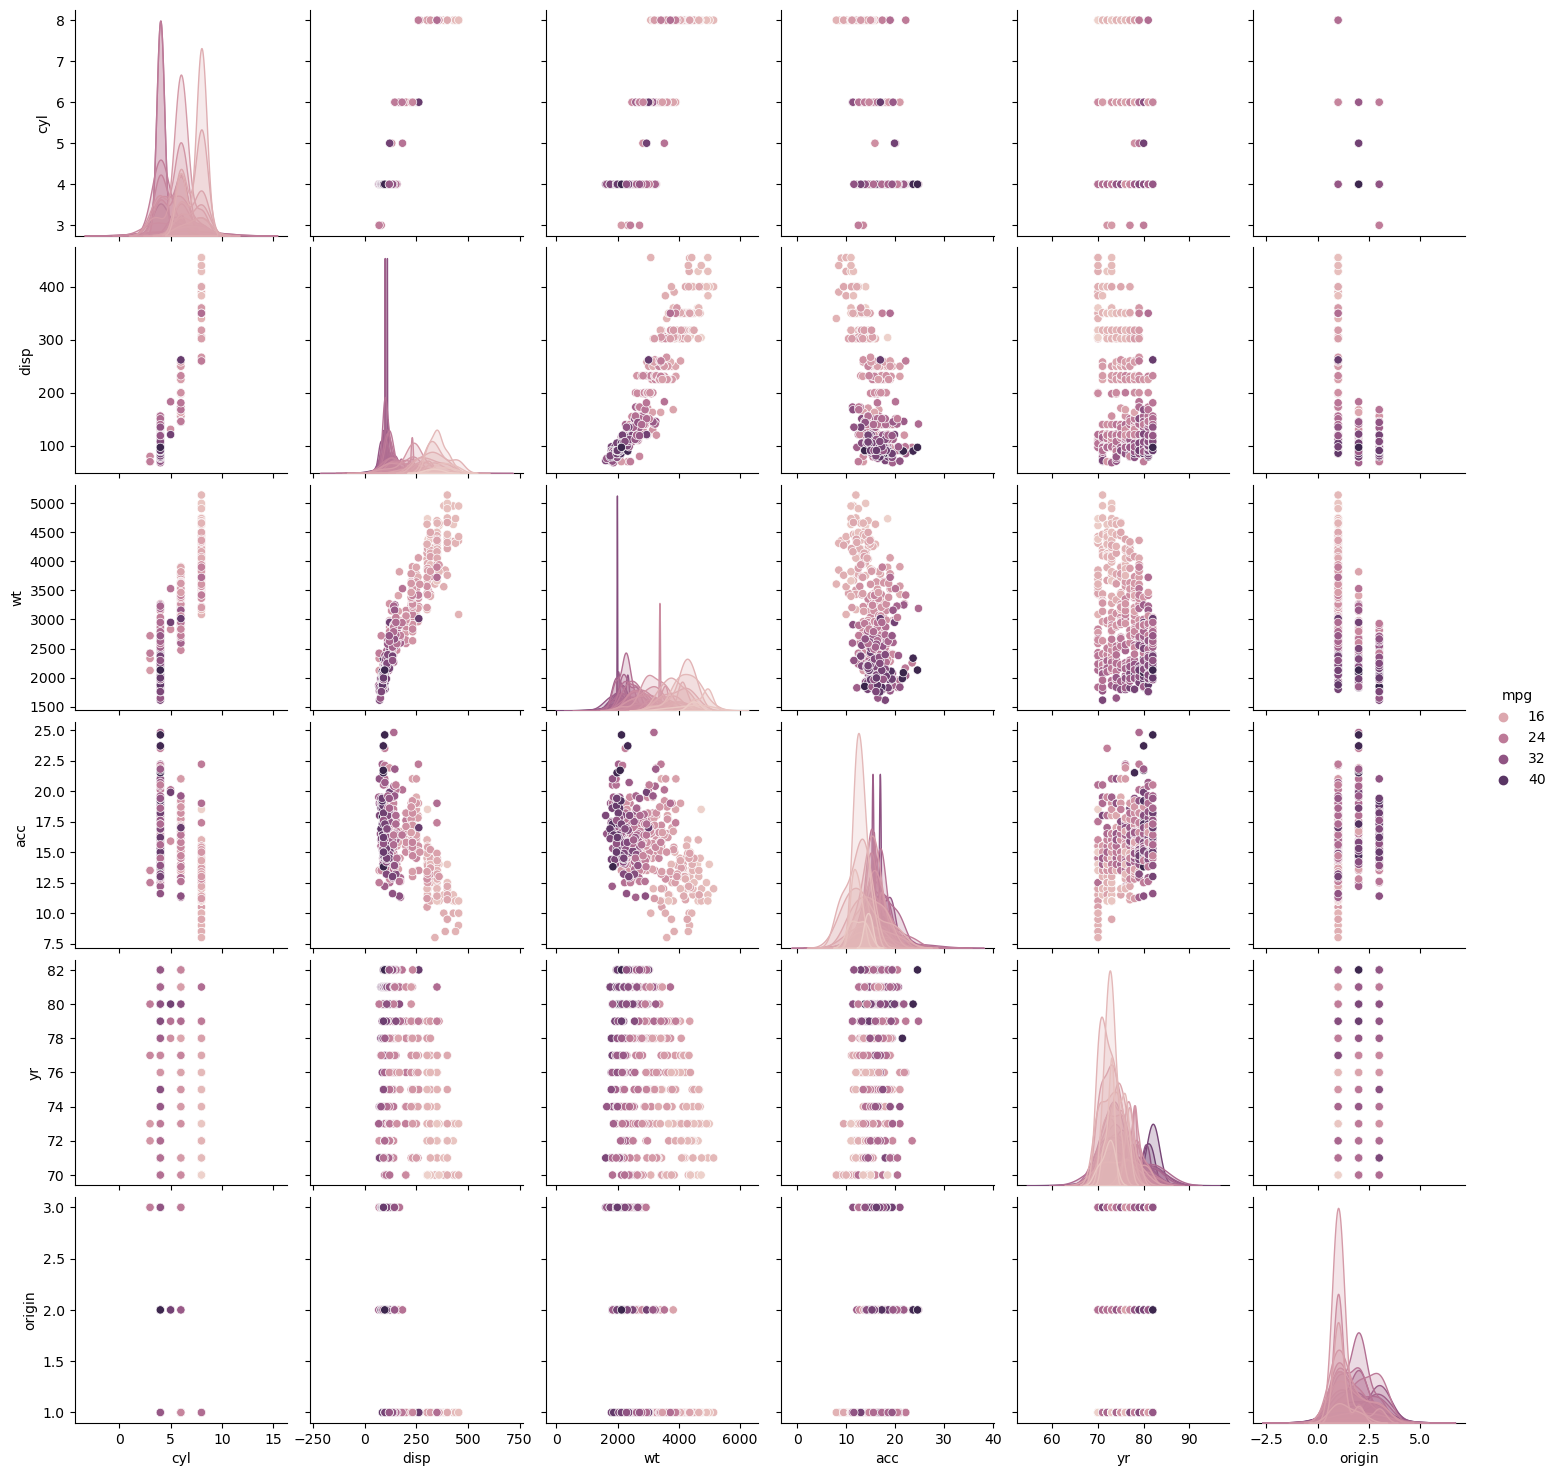

In [209]:
sns.pairplot(result, hue='mpg');

#### 2) D, Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

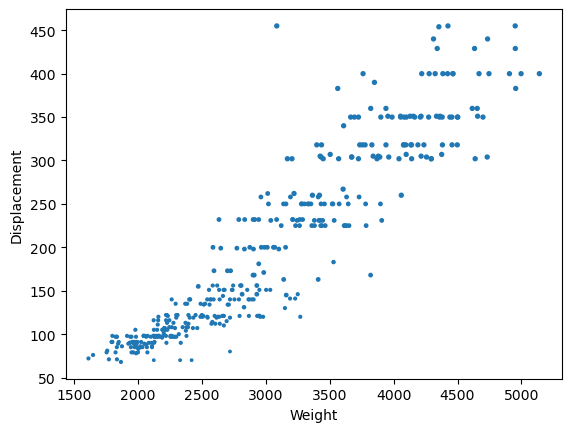

In [210]:
plt.scatter(x=result['wt'],y=result['disp'], s=result['cyl'])
plt.xlabel('Weight')
plt.ylabel('Displacement')
plt.show()

#### 2) E. Share insights for Q2.d

#### 2) F.  Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. 

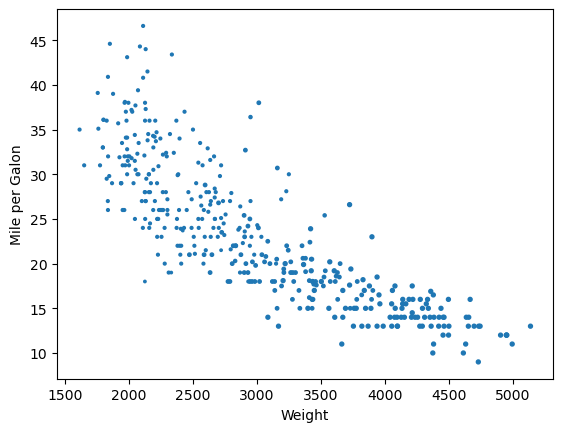

In [211]:
plt.scatter(x=result['wt'],y=result['mpg'], s=result['cyl'])
plt.xlabel('Weight')
plt.ylabel('Mile per Galon')
plt.show()

#### 2) G. Share insights for Q2.f.

#### 2) H. Check for unexpected values in all the features and datapoints with such values

In [212]:
result.isin(['?']).sum() 

car_name    0
mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [213]:

hpIsDigit = pd.DataFrame(result.hp.str.isdigit())
result[hpIsDigit['hp'] == False]



,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,?,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,?,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,?,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,?,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,?,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,?,3035,20.5,82,1


In [214]:
result = result.replace('?',np.nan)
result[hpIsDigit['hp'] == False]

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
32,ford pinto,25.0,4,98.0,NaN,2046,19.0,71,1
126,ford maverick,21.0,6,200.0,NaN,2875,17.0,74,1
330,renault lecar deluxe,40.9,4,85.0,NaN,1835,17.3,80,2
336,ford mustang cobra,23.6,4,140.0,NaN,2905,14.3,80,1
354,renault 18i,34.5,4,100.0,NaN,2320,15.8,81,2
374,amc concord dl,23.0,4,151.0,NaN,3035,20.5,82,1


In [218]:
tst =  result.iloc[:, 1:9]
tst

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [219]:
medianFiller = lambda x: x.fillna(x.median())
result = result.iloc[:, 1:9].apply(medianFiller,axis=0)


### C) Clustering

In [220]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


#### 3)A. Apply K-Means clustering for 2 to 10 clusters.

In [221]:
resultAttr= result.iloc[:,1:]
resultScaled = resultAttr.apply(zscore)

In [222]:
from scipy.spatial.distance import cdist
clusters = range(2,10)
meanDistortions=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(resultScaled)
    prediction=model.predict(resultScaled)
    meanDistortions.append(sum(np.min(cdist(resultScaled, model.cluster_centers_,'euclidean'),axis=1))/resultScaled.shape[0])
    


#### 3)B. Plot a visual and find elbow point.

AttributeError: module 'matplotlib.pyplot' has no attribute 'tile'

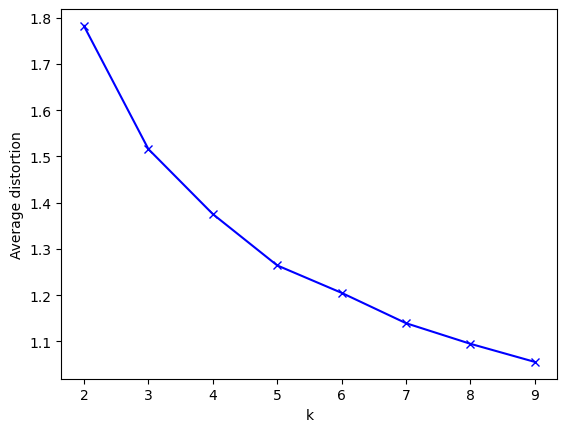

In [223]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.tile('Selecting k with the Elbow Method')

#### 3)D. Train a K-means clustering model once again on the optimal number of clusters. 

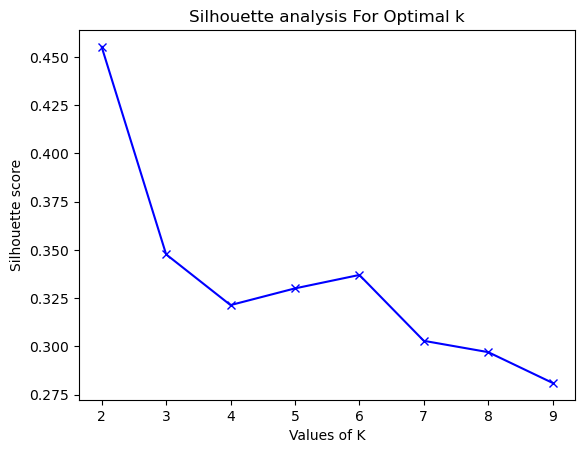

In [224]:
clusters = range(2,10)
silhouette_avg=[]

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(resultScaled)
    cluster_labels = model.labels_
    silhouette_avg.append(silhouette_score(resultScaled, cluster_labels))
    
    
plt.plot(clusters,silhouette_avg,'bx-')    
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

#### 3)E. Add a new feature in the DataFrame which will have labels based upon cluster value. 

In [225]:
final_model=KMeans(3)
final_model.fit(resultScaled)
prediction=final_model.predict(resultScaled)

result["GROUP"] = prediction
resultScaled["GROUP"] = prediction
print("Group Assigned: \n")
result.head(10)

Group Assigned: 



,mpg,cyl,disp,hp,wt,acc,yr,origin,GROUP
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,0


In [226]:
resultClust = resultScaled.groupby(['GROUP'])
resultClust.mean()

,cyl,disp,hp,wt,acc,yr,origin
GROUP,,,,,,,
0,1.486419,1.468657,1.473388,1.367364,-1.033718,-0.611986,-0.715145
1,-0.822197,-0.874027,-0.650891,-0.861831,0.246798,0.136595,1.247867
2,-0.219867,-0.164062,-0.359474,-0.111273,0.433211,0.264678,-0.629320


# Part B

## Data Unerstanding & Cleaning

#### 1)A. Read ‘vehicle.csv’ and save as DataFrame

In [229]:
vehicle_data = pd.read_csv('vehicle.csv')

#### 1)B. Check percentage of missing values and impute with correct approach.

In [253]:
missingColumns = vehicle_data.columns[vehicle_data.isnull().any()==True].tolist()
missingColumns

['circularity',
 'distance_circularity',
 'radius_ratio',
 'pr.axis_aspect_ratio',
 'scatter_ratio',
 'elongatedness',
 'pr.axis_rectangularity',
 'scaled_variance',
 'scaled_variance.1',
 'scaled_radius_of_gyration',
 'scaled_radius_of_gyration.1',
 'skewness_about',
 'skewness_about.1',
 'skewness_about.2']

In [235]:
vehicle_data.isnull().sum() / vehicle_data.shape[0] * 100.00

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [238]:
vehicle_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.0,119.0
circularity,841.0,44.828775,6.152172,33.0,40.00,44.0,49.0,59.0
distance_circularity,842.0,82.110451,15.778292,40.0,70.00,80.0,98.0,112.0
radius_ratio,840.0,168.888095,33.520198,104.0,141.00,167.0,195.0,333.0
pr.axis_aspect_ratio,844.0,61.678910,7.891463,47.0,57.00,61.0,65.0,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.0,55.0
scatter_ratio,845.0,168.901775,33.214848,112.0,147.00,157.0,198.0,265.0
elongatedness,845.0,40.933728,7.816186,26.0,33.00,43.0,46.0,61.0
pr.axis_rectangularity,843.0,20.582444,2.592933,17.0,19.00,20.0,23.0,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.0,188.0


In [254]:
for i in missingColumns:
 vehicle_data.loc[vehicle_data.loc[:,i].isnull(),i]=vehicle_data.loc[:,i].median()


In [255]:
vehicle_data.isnull().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

#### 1)D. Check for duplicate rows in the data and impute with correct approach.

In [267]:
vehicle_data.loc[vehicle_data.duplicated(), :]

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class


### 2. Data Preparation

#### 2)A. Split data into X and Y

In [269]:
from sklearn.model_selection import train_test_split

X = vehicle_data.drop("class", axis=1)
y = vehicle_data.pop("class")

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=1)

#### 2)B. Standardize the Data

In [276]:
X_train.head(4)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
135,89,47.0,83.0,322.0,133.0,48,158.0,43.0,20.0,163,229.0,364.0,176.0,97.0,0.0,14.0,184.0,194
223,81,44.0,72.0,139.0,60.0,6,153.0,44.0,19.0,146,180.0,347.0,178.0,81.0,1.0,15.0,182.0,186
388,94,47.0,85.0,333.0,138.0,49,155.0,43.0,19.0,155,320.0,354.0,187.0,135.0,12.0,9.0,188.0,196
134,102,54.0,100.0,163.0,53.0,10,213.0,31.0,24.0,173,219.0,669.0,201.0,76.0,12.0,27.0,187.0,195


In [280]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#y_train_std = scaler.transform(y_train)
#y_test_std = scaler.transform(y_test)

### 3. Model Building

#### 3)A. Train a base Classification model using SVM

In [282]:
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report

In [283]:
classifier = svm.SVC(kernel='linear', C=0.01) 
y_pred = classifier.fit(X_train_std, y_train).predict(X_test_std)

#### 3)B. Print Classification metrics for train data

In [285]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         bus       0.78      0.86      0.82        37
         car       0.96      0.84      0.90        90
         van       0.86      1.00      0.92        43

    accuracy                           0.89       170
   macro avg       0.87      0.90      0.88       170
weighted avg       0.90      0.89      0.89       170



#### 3)C. Apply PCA on the data with 10 components.

In [294]:
from sklearn.decomposition import PCA
from scipy.stats import zscore


In [309]:
XScaled = X.apply(zscore)
XScaled.head(5)
pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

#### 3)D. Visualize Cumulative Variance Explained with Number of Components.

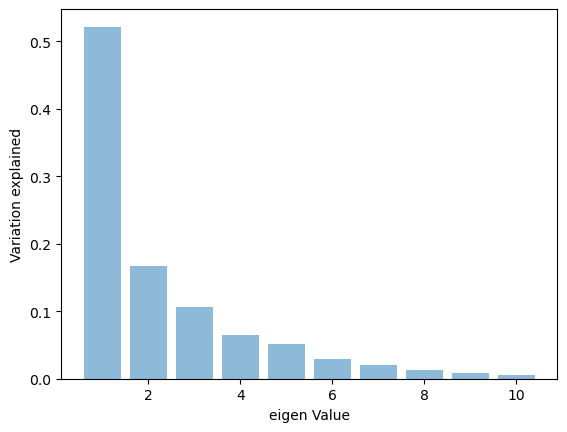

In [311]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

#### 3)F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. 

In [338]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
pca = PCA(n_components=0.90)
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

#### 3)G. Train SVM model on components selected from above step.

In [339]:

clf = svm.SVC()
pred = clf.fit(X_t_train, y_train).predict(X_t_test)

#### 3)H. Print Classification metrics for train data of above model and share insights.

In [341]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         bus       0.44      0.78      0.56        82
         car       0.86      0.61      0.72       183
         van       0.65      0.54      0.59        74

    accuracy                           0.64       339
   macro avg       0.65      0.64      0.62       339
weighted avg       0.71      0.64      0.65       339



### 4. Performance Improvement